# ANUKUL KUMAR
##1806093
##KNN


In [ ]:
from google.colab import files

uploaded = files.upload()


for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_diagnosis.csv to heart_diagnosis.csv
User uploaded file "heart_diagnosis.csv" with length 11327 bytes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,classification_report

In [ ]:
data=pd.read_csv("/content/heart_diagnosis.csv")

#The dataset contained '?' in some rows of two columns,
#so I had to remove all those rows.

data.drop(data[data['ca']=='?'].index,inplace=True)
data.drop(data[data["thal"]=='?'].index,inplace=True)
data

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,severity
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbp   297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  severity  297 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 34.8+ KB


In [ ]:
data.describe()

,age,sex,cp,trestbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,severity
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [ ]:
#getting the count of each class

data.severity.value_counts()

0    160
1     54
3     35
2     35
4     13
Name: severity, dtype: int64

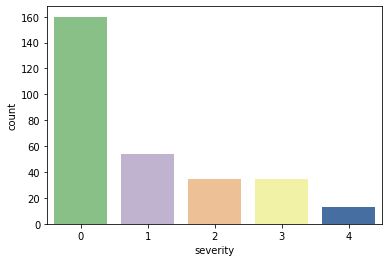

In [ ]:
sns.countplot(x="severity",data=data,palette="Accent")
plt.show()


#we can see that the dataset has imbalanced class distribution
#so we can expect the prediction model to be more biased toward '0'

In [ ]:
sc=StandardScaler()
c_scale=['age','trestbp','chol','fbs','thalach']
data[c_scale]=sc.fit_transform(data[c_scale])
data
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values


In [ ]:
y=data['severity']
X=data.drop(['severity'],axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.33)
knn_scores = []
for k in range(1,21):
    knn_classifier = KNN(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

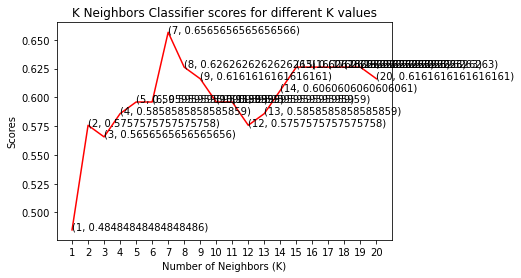

In [ ]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



##### using only parameter weights='uniform' and n_neighbor
####
maxK=-1
maxAcc=-1
print('Uniform')
preds
for i in range (1,21):
  model = KNN(n_neighbors=i,weights='uniform',metric='minkowski')
  model.fit(X_train, y_train) 
  preds = model.predict(X_test)
  acc =metrics.accuracy_score(y_test, preds)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i  
  print('Model accuracy at k={} {:.2f}'.format(i,acc*100))

print('Maximum accuracy achieved at k= {} '.format(maxK))
print()
print('Maximum acuracy achieved : {:.2f}' .format(maxAcc*100))
model=KNN(n_neighbors=maxK,weights='uniform',metric='minkowski')
model.fit(X_train,y_train)
preds=model.predict(X_test)
confusion = confusion_matrix(y_test,preds)
print('Confusion Matrix\n')
print(confusion)
print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, preds, target_names=['Class 0','Class 1', 'Class 2', 'Class 3','Class 4']))


Uniform
Model accuracy at k=1 50.67
Model accuracy at k=2 53.33
Model accuracy at k=3 62.67
Model accuracy at k=4 57.33
Model accuracy at k=5 61.33
Model accuracy at k=6 61.33
Model accuracy at k=7 58.67
Model accuracy at k=8 60.00
Model accuracy at k=9 54.67
Model accuracy at k=10 54.67
Model accuracy at k=11 54.67
Model accuracy at k=12 54.67
Model accuracy at k=13 54.67
Model accuracy at k=14 53.33
Model accuracy at k=15 53.33
Model accuracy at k=16 54.67
Model accuracy at k=17 54.67
Model accuracy at k=18 54.67
Model accuracy at k=19 54.67
Model accuracy at k=20 54.67
Maximum accuracy achieved at k= 3 

Maximum acuracy achieved : 62.67
Confusion Matrix

[[36  3  2  1  0]
 [11  7  0  1  0]
 [ 1  2  3  0  0]
 [ 1  4  0  1  0]
 [ 0  0  1  1  0]]
Micro Precision: 0.63
Micro Recall: 0.63
Micro F1-score: 0.63

Macro Precision: 0.38
Macro Recall: 0.38
Macro F1-score: 0.38

Weighted Precision: 0.58
Weighted Recall: 0.63
Weighted F1-score: 0.60

Classification Report

              precisio

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

#### using only parameter weights='distance' and n_neighbor
####


X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

maxK=-1
maxAcc=-1
print('Distance')
for i in range (1,21):
  model = KNN(n_neighbors=i,weights='distance',metric='minkowski')
  model.fit(X_train, y_train) 
  preds = model.predict(X_test)
  acc =metrics.accuracy_score(y_test, preds)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i    
  print('Model accuracy at k={} {:.2f}'.format(i,acc*100))

print('Maximum accuracy achieved at k= {} '.format(maxK))
print()
print('Maximum acuracy achieved : {:.2f}' .format(maxAcc*100))
model=KNN(n_neighbors=maxK,weights='uniform',metric='minkowski')
model.fit(X_train,y_train)
preds=model.predict(X_test)
confusion = confusion_matrix(y_test,preds)
print('Confusion Matrix\n')
print(confusion)
print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, preds, target_names=['Class 0','Class 1', 'Class 2', 'Class 3','Class 4']))

Distance
Model accuracy at k=1 53.33
Model accuracy at k=2 53.33
Model accuracy at k=3 52.00
Model accuracy at k=4 54.67
Model accuracy at k=5 53.33
Model accuracy at k=6 54.67
Model accuracy at k=7 56.00
Model accuracy at k=8 58.67
Model accuracy at k=9 58.67
Model accuracy at k=10 57.33
Model accuracy at k=11 54.67
Model accuracy at k=12 54.67
Model accuracy at k=13 50.67
Model accuracy at k=14 50.67
Model accuracy at k=15 50.67
Model accuracy at k=16 50.67
Model accuracy at k=17 50.67
Model accuracy at k=18 49.33
Model accuracy at k=19 52.00
Model accuracy at k=20 50.67
Maximum accuracy achieved at k= 8 

Maximum acuracy achieved : 58.67
Confusion Matrix

[[35  3  0  0  0]
 [ 9  3  1  0  0]
 [ 3  3  2  0  0]
 [ 1  5  3  2  0]
 [ 0  3  2  0  0]]
Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.43
Macro Recall: 0.32
Macro F1-score: 0.31

Weighted Precision: 0.57
Weighted Recall: 0.56
Weighted F1-score: 0.52

Classification Report

              precisi

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
####
#### using all the parameters weigths & algorithm and n_neighbor
####

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
maxK=-1
maxAcc=-1
ind=-1

for i in range (1,21):
  model1= KNN(n_neighbors=i,weights='uniform',algorithm='auto')
  model1.fit(X_train,y_train)
  pred1=model1.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred1)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i
    ind=0

  model2= KNN(n_neighbors=i,weights='uniform',algorithm='kd_tree')
  model2.fit(X_train,y_train)
  pred2=model2.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred2)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i
    ind=1 

  model3= KNN(n_neighbors=i,weights='uniform',algorithm='ball_tree')
  model3.fit(X_train,y_train)
  pred3=model3.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred3)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i 
    ind=2

  model4= KNN(n_neighbors=i,weights='distance',algorithm='auto')
  model4.fit(X_train,y_train)
  pred4=model4.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred4)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i 
    ind=3

  model5= KNN(n_neighbors=i,weights='distance',algorithm='kd_tree')
  model5.fit(X_train,y_train)
  pred5=model5.predict(X_test)
  acc=metrics.accuracy_score(y_test, pred5)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i 
    ind=4

  model6= KNN(n_neighbors=i,weights='distance',algorithm='ball_tree')
  model6.fit(X_train, y_train) 
  pred6= model6.predict(X_test)
  acc =metrics.accuracy_score(y_test, pred6)
  if(acc>maxAcc):
    maxAcc=acc
    maxK=i    
    ind=5

print('Maximum accuracy achieved at k= {} '.format(maxK))
print(ind)
print('Maximum acuracy achieved : ')
print('{:.2f}'.format(maxAcc*100))
model=KNN(n_neighbors=maxK,weights='uniform',algorithm='auto')
model.fit(X_train,y_train)
preds=model.predict(X_test)
confusion = confusion_matrix(y_test,preds)
print('Confusion Matrix\n')
print(confusion)
print('Micro Precision: {:.2f}'.format(precision_score(y_test, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, preds, average='weighted')))
print('\nClassification Report\n')
print(classification_report(y_test, preds, target_names=['Class 0','Class 1', 'Class 2', 'Class 3','Class 4']))

Maximum accuracy achieved at k= 4 
3
Maximum acuracy achieved : 
65.33
Confusion Matrix

[[41  1  0  1  0]
 [ 6  0  0  0  0]
 [ 1  4  2  2  1]
 [ 1  5  1  3  0]
 [ 2  2  1  1  0]]
Micro Precision: 0.61
Micro Recall: 0.61
Micro F1-score: 0.61

Macro Precision: 0.35
Macro Recall: 0.29
Macro F1-score: 0.30

Weighted Precision: 0.58
Weighted Recall: 0.61
Weighted F1-score: 0.59

Classification Report

              precision    recall  f1-score   support

     Class 0       0.80      0.95      0.87        43
     Class 1       0.00      0.00      0.00         6
     Class 2       0.50      0.20      0.29        10
     Class 3       0.43      0.30      0.35        10
     Class 4       0.00      0.00      0.00         6

    accuracy                           0.61        75
   macro avg       0.35      0.29      0.30        75
weighted avg       0.58      0.61      0.59        75



In [ ]:
# As we found that the accuracy is pretty low for multiclass classification. In such case we can implement it 
# as binary classification where the presence of disease can be easily predicted, rather than treating 
# it as absence of any disease. By indicating absence of disease as class 0 and presence as class 1

In [ ]:
# y_train_binary=y_train.copy()
# y_test_binary=y_test.copy()
# y_train_binary[y_train_binary>0]=1
# y_test_binary[y_test_binary>0]=1

In [ ]:
# maxK=-1
# maxAcc=-1
# for i in range (1,21):
#   model = KNN(n_neighbors=i)
#   model.fit(X_train, y_train_binary) 
#   preds = model.predict(X_test)
#   acc =metrics.accuracy_score(y_test_binary, preds)
#   if(acc>maxAcc):
#     maxAcc=acc
#     maxK=i
#   print('Model accuracy at k={} {:.2f}'.format(i,acc*100))

# print('Maximum accuracy achieved at k= {} '.format(maxK))
# print()
# print('Maximum acuracy achieved : ')
# model=KNN(n_neighbors=maxK)
# model.fit(X_train,y_train_binary)
# pred=model.predict(X_test)
# acc=metrics.accuracy_score(y_test_binary,pred)
# print('{:.2f}'.format(acc*100))

# confusion = confusion_matrix(y_test_binary,pred)
# print('Confusion Matrix\n')
# print(confusion)
# print('Micro Precision: {:.2f}'.format(precision_score(y_test_binary, pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(y_test_binary, pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test_binary, pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(y_test_binary, pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(y_test_binary, pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test_binary, pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(y_test_binary, pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(y_test_binary, pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(y_test_binary, pred, average='weighted')))
# print('\nClassification Report\n')
# print(classification_report(y_test_binary, pred, target_names=['Class 0','Class 1']))